In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk


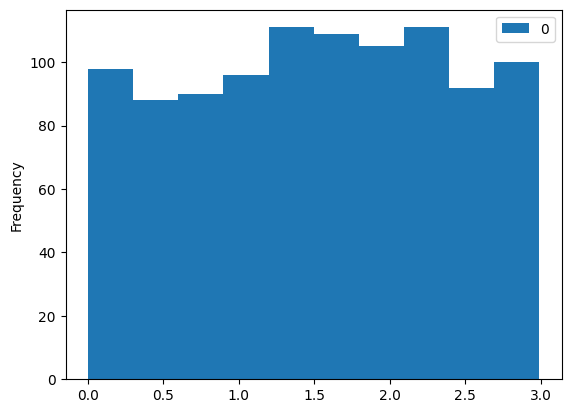

[1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0.

In [2]:
# create synthetic data
X = np.random.rand(1000)*3
y = np.round(np.random.rand(1000))
df = pd.DataFrame(X)
df.plot(kind = 'hist')
plt.show()
print(y)

In [3]:
class LogisticRegression:
    def __init__(self, X, y, learning_rate = 0.001, iterations = 1000, stopping_threshold = 1e-9):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.iterations=iterations
        self.stopping_threshold = stopping_threshold
        self.current_weight = 0
        self.current_bias = 0
        self.maximum_likelihood_history = []
        self.n_samples = X.shape[0]

    def fit(self):

        for i in range(self.iterations):
            # project feature data onto log plane
            # gives each value a candidate log(odds Logistic Regression Details Pt 2: Maximum Likelihood ) value
            candidate_line_features = self.X * self.current_weight + self.current_bias

            # transform candidate log(odds) into probability values (between 0 and 1)
            probability = (np.exp(1)**candidate_line_features/(1+np.exp(1)**candidate_line_features))

            # calculate maximum likelihood
            y_array = np.array(self.y)
            epsilon = 1e-9
            likelihood = -np.mean(self.y*np.log(probability+epsilon)+(1-self.y)* np.log(1-probability+epsilon))
            self.maximum_likelihood_history.append(likelihood)

            #calculate gradients(partial derivative)
            error = probability - self.y
            weight_gradient = (1 / self.n_samples) * self.X.T @ error
            bias_gradient = (1 / self.n_samples) * np.sum(error)

            #update weights
            self.current_weight = self.current_weight-self.learning_rate*weight_gradient
            self.current_bias = self.current_bias-self.learning_rate*bias_gradient

            if i%10==0:
                print(f"iteration: {i}, cost change: {np.abs(self.maximum_likelihood_history[i-1]-self.maximum_likelihood_history[i])}, cost: {self.maximum_likelihood_history[i]}")

            if i > 0 and np.abs(self.maximum_likelihood_history[i-1]-self.maximum_likelihood_history[i]) < self.stopping_threshold:
                break

    def predict(self, X_test):
        line = X_test * self.current_weight + self.current_bias

        # transform candidate log(odds) into probability values (between 0 and 1)
        y_pred = (np.exp(1)**line/(1+np.exp(1)**line))
        predictions = np.round(y_pred)
        return predictions


In [5]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size = 0.2)

logisticRegression = LogisticRegression(X, y, learning_rate=0.00001, iterations=200000, stopping_threshold = 1e-11)

logisticRegression.fit()
y_pred = logisticRegression.predict(X_test)

pred = pd.DataFrame(y_pred, columns=['y_pred'])
pred.value_counts()


iteration: 0, cost change: 0.0, cost: 0.6931471785599453
iteration: 10, cost change: 1.4017021543466512e-08, cost: 0.6931470383779094
iteration: 20, cost change: 1.4014395532946367e-08, cost: 0.693146898222137
iteration: 30, cost change: 1.4011769855493128e-08, cost: 0.6931467580926236
iteration: 40, cost change: 1.40091446221291e-08, cost: 0.693146617989364
iteration: 50, cost change: 1.4006519943876583e-08, cost: 0.6931464779123531
iteration: 60, cost change: 1.4003895820735579e-08, cost: 0.6931463378615857
iteration: 70, cost change: 1.400127236372839e-08, cost: 0.6931461978370569
iteration: 80, cost change: 1.3998649128765805e-08, cost: 0.6931460578387618
iteration: 90, cost change: 1.3996026559937036e-08, cost: 0.6931459178666953
iteration: 100, cost change: 1.3993404435197476e-08, cost: 0.6931457779208523
iteration: 110, cost change: 1.3990782754547126e-08, cost: 0.6931456380012277
iteration: 120, cost change: 1.3988161629008289e-08, cost: 0.6931454981078166
iteration: 130, cost 

y_pred
1.0       200
Name: count, dtype: int64

In [ ]:
# Create synthetic data WITH a relationship
n_samples = 1000
X = np.random.rand(n_samples, 1) * 10 - 5 # X values between -5 and 5

# Define a true relationship (e.g., probability increases with X)
true_bias = 0.5
true_weight = 1.5
logits = X * true_weight + true_bias
probabilities = 1 / (1 + np.exp(-logits)) # Sigmoid function
y = (probabilities > np.random.rand(n_samples, 1)).astype(int) # Generate 0/1 based on probability

# Now split THIS data and train
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Training on Structured Data ---")
# Use appropriate LR and threshold for structured data
logisticRegression_structured = LogisticRegression(X_train, y_train, learning_rate=0.01, iterations=10000, stopping_threshold=1e-15)
logisticRegression_structured.fit() # Pass training data to fit

# Plot cost history
plt.figure()
plt.plot(logisticRegression_structured.maximum_likelihood_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Convergence (Structured Data)")
plt.grid(True)
plt.show()

# Evaluate
from sklearn.metrics import accuracy_score
predictions = logisticRegression_structured.predict(X_test)
print(f"Accuracy on structured test data: {accuracy_score(y_test, predictions):.4f}")